In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils import *
from fastai.conv_learner import *
from fastai.plots import *
from torch.nn.init import xavier_normal

In [3]:
path = 'data'
get_mnist(path)

In [4]:
trn_x = np.load(os.path.join(path, 'mnist', 'train_x.npy'))
trn_y = np.load(os.path.join(path, 'mnist', 'train_y.npy'))

test_x = np.load(os.path.join(path, 'mnist', 'test_x.npy'))
test_y = np.load(os.path.join(path, 'mnist', 'test_y.npy'))

avg = np.mean(trn_x/255)
std = np.std(trn_x/255)

In [5]:
tfms = tfms_from_stats([avg, std], 28, pad=1, aug_tfms=[RandomScale(28, 1.05)])
data = ImageClassifierData.from_paths(os.path.join(path, 'mnist'), val_name='test', tfms=tfms)

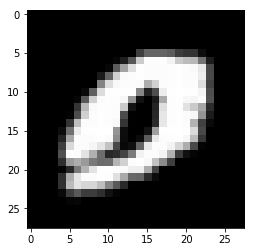

In [6]:
plt.imshow(data.trn_ds[2][0], cmap='gray')

In [7]:
class FCNet(nn.Module):
    def __init__(self, ps, activation=F.relu):
        super().__init__()
        self.ps = ps
        self.activation = activation
        
        self.layers = nn.ModuleList([
            nn.Linear(784, 1024),
            nn.Linear(1024, 1024),
        ])
        for l in self.layers:
            xavier_normal(l.weight.data)
        
        self.l_out = nn.Linear(1024, 10)
        xavier_normal(self.l_out.weight.data)

        
    def forward(self, x):
        x = x.view(-1, 784)
        
        x = F.dropout(x, self.ps[0])
        for l, p in zip(self.layers, self.ps[1:]):
            x = l(x)
            x = self.activation(x)
            x = F.dropout(x, p)
        return F.log_softmax(F.dropout(self.l_out(x),0.05))

In [8]:
m = FCNet((0.64, 0.64, 0.32))
learn = ConvLearner.from_model_data(m, data, opt_fn=optim.RMSprop)

In [9]:
%%time
learn.fit(1e-3, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   accuracy        
    0      0.092029   0.094649   0.969845  
    1      0.086797   0.104319   0.968949        
    2      0.032831   0.061675   0.982186        
    3      0.081932   0.097683   0.971835        
    4      0.046173   0.08281    0.978503        
    5      0.017175   0.068229   0.98338         
    6      0.009054   0.068084   0.984375        
    7      0.061817   0.148123   0.967954        
    8      0.054661   0.115921   0.977209        
    9      0.041997   0.106179   0.980991        
    10     0.024924   0.114512   0.980195        
    11     0.013965   0.12033    0.983479        
    12     0.005543   0.120646   0.984176        
    13     0.001575   0.123283   0.985271        
    14     0.000802   0.127225   0.984972        

CPU times: user 5min 23s, sys: 2min 41s, total: 8min 4s
Wall time: 4min 14s


[0.12722531, 0.98497213375796178]